<a href="https://colab.research.google.com/github/Smarth2005/Machine-Learning/blob/main/Data%20Preprocessing/Feature%20Scaling%20and%20Transformation/5.%20MaxAbsScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📌 MaxAbsScaler (For Sparse & Signed Data)

The `MaxAbsScaler` scales each feature by its **maximum absolute value**, transforming the data into the range **[-1, 1]**.  
It is especially suited for **sparse data** (i.e., with many zeros) and features that may contain both **positive and negative** values.

#### <u>Mathematical Formula</u>

$$
x' = \frac{x}{\max(|x|)}
$$

Where:

- $x$ : Original value  
- $x'$ : Scaled value  
- $\max(|x|)$: Maximum absolute value of the feature  

#### <u>When to Use `MaxAbsScaler` ?</u>

- When working with sparse datasets (e.g., text data in NLP, one-hot encoded features)
- When you need to preserve sign (positive/negative) and sparsity
- When you want to scale data without shifting it (does not center the data like `StandardScaler` or `RobustScaler`)

#### <u>Effect on Data</u>

- Scales each feature to the range **[-1, 1]**  
- Maintains zero entries — important for sparse matrix compatibility
- Does not center the data (mean is not shifted to 0)  
- Sensitive to outliers (like `MinMaxScaler`)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing   import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestRegressor
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.svm             import SVR
from sklearn.pipeline        import Pipeline

In [2]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
X = X.iloc[:,:-2]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [6]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
def plots(df, var, t):
  plt.figure(figsize=(13,5))
  plt.subplot(121)
  sns.kdeplot(df[var])
  plt.title('before ' + str(t).split('(')[0])

  plt.subplot(122)
  p1 = t.fit_transform(df[[var]]).flatten()
  sns.kdeplot(p1)
  plt.title('after ' + str(t).split('(')[0])

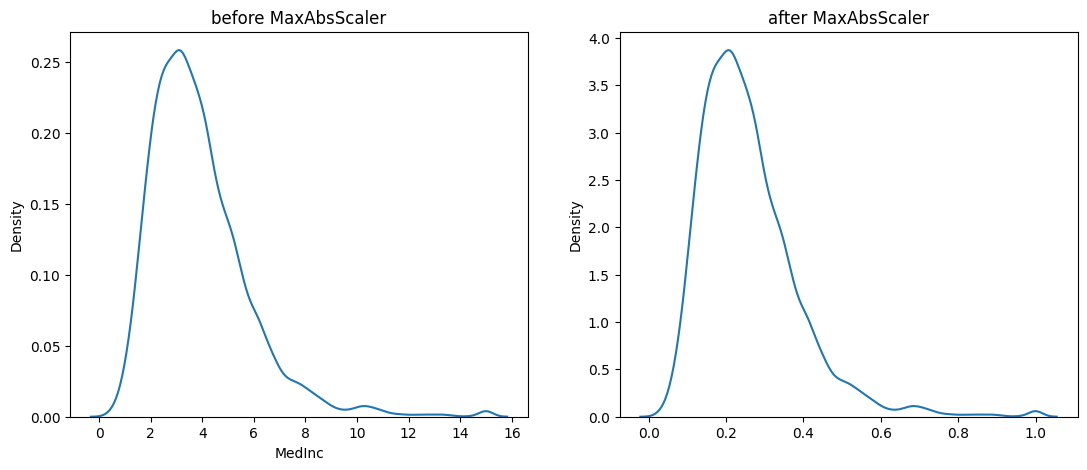

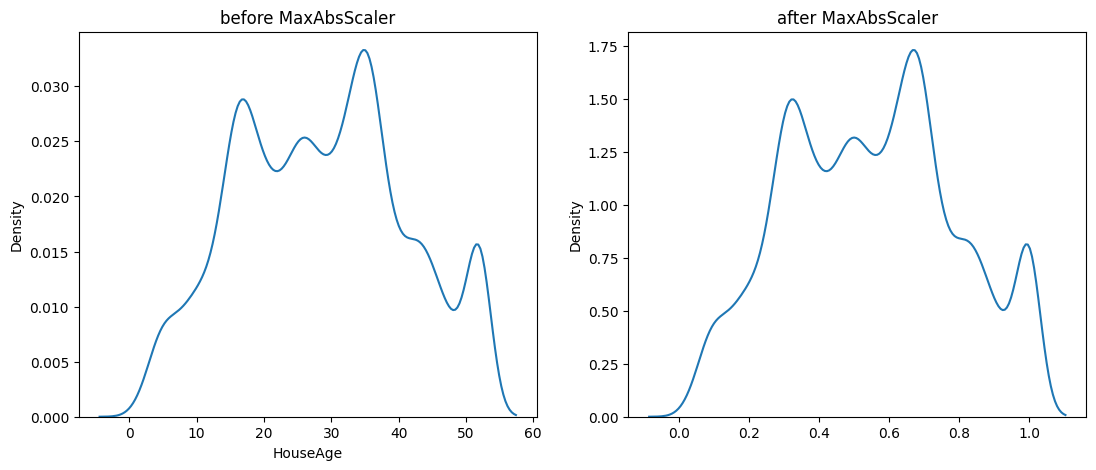

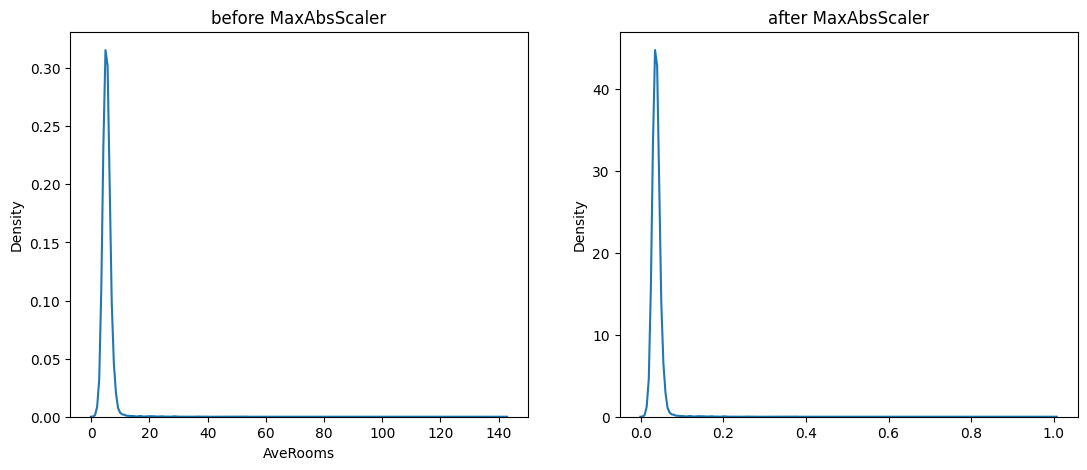

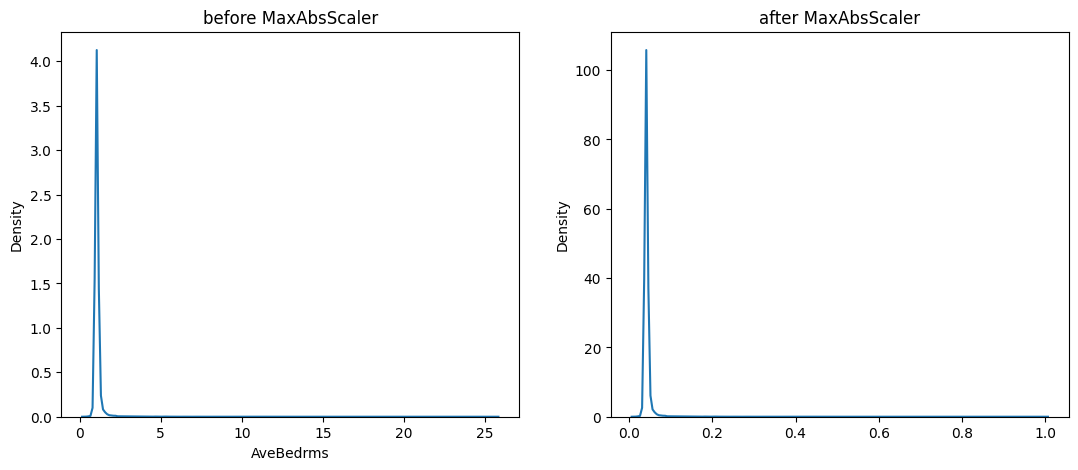

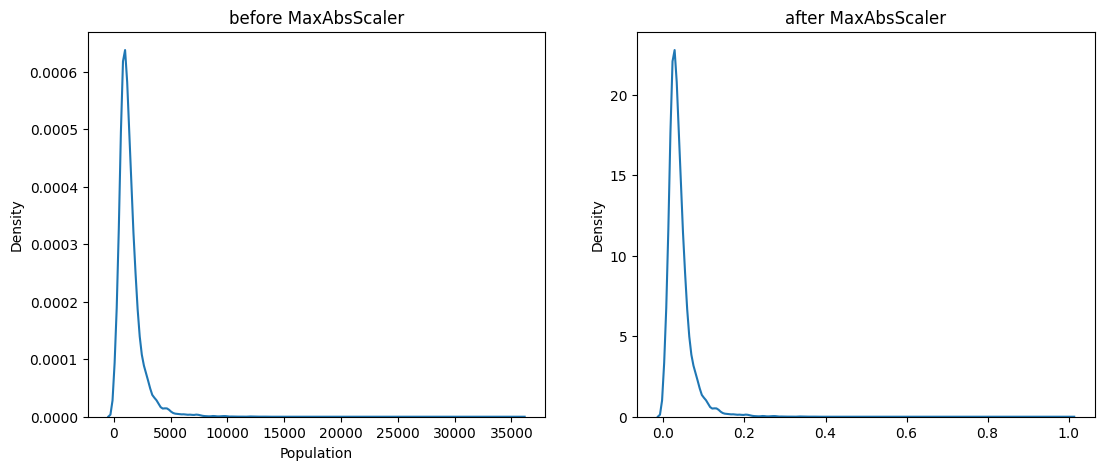

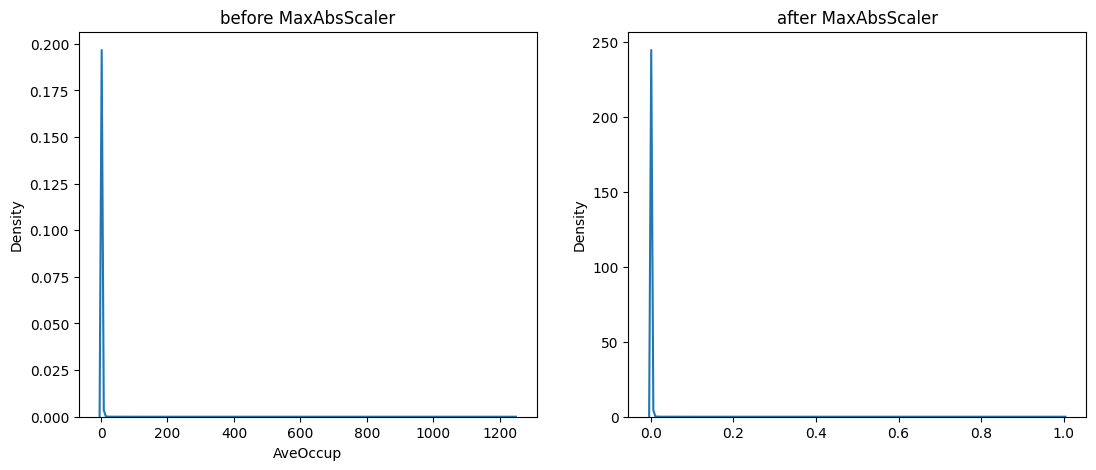

In [9]:
for col in x_train.columns:
  plots(x_train, col, MaxAbsScaler())

In [10]:
def model_accuracy_scaled(mod):
  model_scaled = Pipeline([
      ('scale', MaxAbsScaler()),
      ('model', mod)
  ])
  model_scaled.fit(x_train, y_train)
  return model_scaled.score(x_test, y_test)

def model_accuracy_unscaled(mod):
  model_unscaled = Pipeline([
      ('model', mod)
  ])
  model_unscaled.fit(x_train, y_train)
  return model_unscaled.score(x_test, y_test)

In [11]:
# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Print accuracy scores
print(f"{'Model':<25} {'Unscaled R²':<15} {'Scaled R²'}")
print("-" * 55)
for name, model in models.items():
    unscaled_score = model_accuracy_unscaled(model)
    scaled_score = model_accuracy_scaled(model)
    print(f"{name:<25} {unscaled_score:<15.4f} {scaled_score:.4f}")

Model                     Unscaled R²     Scaled R²
-------------------------------------------------------
Linear Regression         0.5099          0.5099
KNN Regressor             0.1609          0.5066
SVR                       -0.0166         0.5495
Random Forest             0.6775          0.6776


The conclusions are essentially the same across all scalers (`StandardScaler`, `MinMaxScaler`, `RobustScaler`, `MaxAbsScaler`), with just a few context-specific nuances.